In [1]:
from google.colab import drive
from google.colab import files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import os

In [4]:
drive.mount("/content/drive")
file_path = ('/content/drive/MyDrive/Colab Notebooks/MLE_human_scream/')
file_path2 = ('/content/drive/MyDrive/Colab Notebooks/MLE_nonscream/')
file = files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving Baby+Laugh+1.wav to Baby+Laugh+1.wav
Saving Sneeze+2.wav to Sneeze+2.wav
Saving Sneeze+1.wav to Sneeze+1.wav
Saving Yawn+6.wav to Yawn+6.wav
Saving Hiccup+Hicough+3.wav to Hiccup+Hicough+3.wav
Saving Giggle+8.wav to Giggle+8.wav
Saving Giggle+9.wav to Giggle+9.wav
Saving Gasp+2.wav to Gasp+2.wav
Saving Gasp+3.wav to Gasp+3.wav
Saving Explosion+2.wav to Explosion+2.wav
Saving carhorn.wav to carhorn.wav
Saving car+running3.wav to car+running3.wav
Saving car+horn+x.wav to car+horn+x.wav
Saving Car+Alarm.wav to Car+Alarm.wav
Saving BMW+DRIVEBY.wav to BMW+DRIVEBY.wav
Saving bus_door.wav to bus_door.wav
Saving Wdog_drinking.wav to Wdog_drinking.wav
Saving water_running_loop.wav to water_running_loop.wav
Saving city_traffic.wav to city_traffic.wav
Saving CAR-DOOR.wav to CAR-DOOR.wav
Saving AMBsiren.wav to AMBsiren.wav
Saving Laugh+Female.wav to Laugh+Female.wav
Saving Laugh+5.wav to Laugh+5.wav
Saving Laugh+6.wav to Laugh+6.wav
Saving Laugh+4.wav to Laugh+4.wav
Saving forest_fire.wav t

In [5]:
# feature_vector = pd.DataFrame()
# target = []

# for file in os.listdir(file_path):
#   print("Analyzing file ", str(file))

#   y,sr = librosa.load(file, sr=None)
#   y = librosa.effects.time_stretch(y, rate=0.5)

#   mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
#   spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
#   rms = librosa.feature.rms(y=y)
#   chroma = librosa.feature.chroma_stft(y=y,sr=sr)

#   mfccs_mean = pd.Series(np.mean(mfccs.T, axis=0))
#   sc_mean = pd.Series(np.mean(chroma.T, axis=0))
#   rms_mean = pd.Series(np.mean(spectral_contrast.T, axis=0))
#   chroma_mean = pd.Series(np.mean(rms.T, axis=0))

#   target = pd.Series(np.array(['Scream']))

#   binary = pd.Series(np.array([0]))

#   features = pd.concat([mfccs_mean, sc_mean, rms_mean, chroma_mean, target, binary], axis=0)

#   feature_vector = feature_vector._append(features, ignore_index =True)

# for file in os.listdir(file_path2):
#   print("Analyzing file ", str(file))

#   y,sr = librosa.load(file, sr=None)
#   y = librosa.effects.time_stretch(y, rate=0.5)

#   mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
#   spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
#   rms = librosa.feature.rms(y=y)
#   chroma = librosa.feature.chroma_stft(y=y,sr=sr)

#   mfccs_mean = pd.Series(np.mean(mfccs.T, axis=0))
#   sc_mean = pd.Series(np.mean(chroma.T, axis=0))
#   rms_mean = pd.Series(np.mean(spectral_contrast.T, axis=0))
#   chroma_mean = pd.Series(np.mean(rms.T, axis=0))

#   target = pd.Series(np.array(['Nonscream']))
#   binary = pd.Series(np.array([1]))

#   features = pd.concat([mfccs_mean, sc_mean, rms_mean, chroma_mean, target, binary], axis=0)

#   feature_vector = feature_vector._append(features, ignore_index =True)


# feature_vector.columns = ["mfcss1","mfcss2","mfcss3","mfcss4","mfcss5","mfcss6","mfcss7","mfcss8","mfcss9","mfcss10","mfcss11","mfcss12","mfcss13",
#                           "sc1","sc2","sc3","sc4","sc5","sc6","sc7","sc8","sc9","sc10","sc11","sc12",
#                           "rms1","rms2","rms3","rms4","rms5","rms6","rms7",
#                           "chroma",
#                           "target",
#                           "binary"]

# print(sr)

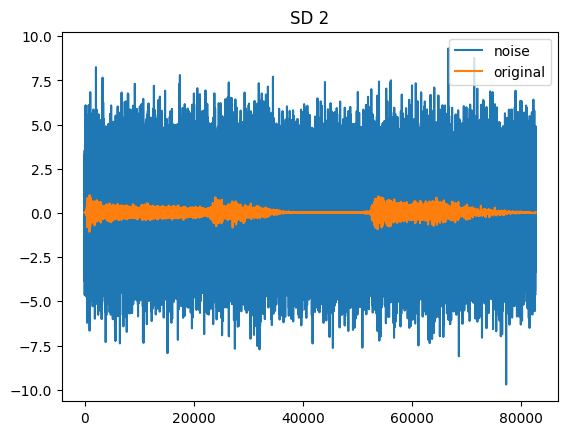

In [108]:
path = os.listdir(file_path)
clip = path[0]
yorig,sr = librosa.load(file, sr=None)
yorig = librosa.effects.time_stretch(yorig, rate=0.5)
noise = np.random.normal(0,2, yorig.size)
y = yorig + noise
plt.plot(y, label="noise")

plt.plot(yorig, label="original")
plt.title("SD 2")
plt.legend()


In [109]:
feature_vector = pd.DataFrame()
target = []

for file in os.listdir(file_path):
  print("Analyzing file ", str(file))

  y,sr = librosa.load(file, sr=None)
  y = librosa.effects.time_stretch(y, rate=0.5)
  chunkstep = int(y.size/20)

  for i in range(1,20):
      chunk = y[(i-1)*chunkstep:i*chunkstep]
      if np.sum(np.abs(chunk)) > 1e-4:
        mfccs = librosa.feature.mfcc(y=chunk, sr=sr, n_mfcc=13)
        spectral_contrast = librosa.feature.spectral_contrast(y=chunk, sr=sr)
        rms = librosa.feature.rms(y=chunk)
        chroma = librosa.feature.chroma_stft(y=chunk,sr=sr)

        mfccs_mean = pd.Series(np.mean(mfccs.T, axis=0))
        sc_mean = pd.Series(np.mean(chroma.T, axis=0))
        rms_mean = pd.Series(np.mean(spectral_contrast.T, axis=0))
        chroma_mean = pd.Series(np.mean(rms.T, axis=0))

        target = pd.Series(np.array(['Scream']))

        binary = pd.Series(np.array([0]))

        features = pd.concat([mfccs_mean, sc_mean, rms_mean, chroma_mean, target, binary], axis=0)

        feature_vector = feature_vector._append(features, ignore_index =True)

for file in os.listdir(file_path2):
  print("Analyzing file ", str(file))

  y,sr = librosa.load(file, sr=None)
  y = librosa.effects.time_stretch(y, rate=0.5)
  chunkstep = int(y.size/20)

  for i in range(1,20):
      chunk = y[(i-1)*chunkstep:i*chunkstep]
      if np.sum(np.abs(chunk)) > 1e-4:
        mfccs = librosa.feature.mfcc(y=chunk, sr=sr, n_mfcc=13)
        spectral_contrast = librosa.feature.spectral_contrast(y=chunk, sr=sr)
        rms = librosa.feature.rms(y=chunk)
        chroma = librosa.feature.chroma_stft(y=chunk,sr=sr)

        mfccs_mean = pd.Series(np.mean(mfccs.T, axis=0))
        sc_mean = pd.Series(np.mean(chroma.T, axis=0))
        rms_mean = pd.Series(np.mean(spectral_contrast.T, axis=0))
        chroma_mean = pd.Series(np.mean(rms.T, axis=0))

        target = pd.Series(np.array(['NonScream']))

        binary = pd.Series(np.array([1]))

        features = pd.concat([mfccs_mean, sc_mean, rms_mean, chroma_mean, target, binary], axis=0)

        feature_vector = feature_vector._append(features, ignore_index =True)


feature_vector.columns = ["mfcss1","mfcss2","mfcss3","mfcss4","mfcss5","mfcss6","mfcss7","mfcss8","mfcss9","mfcss10","mfcss11","mfcss12","mfcss13",
                          "sc1","sc2","sc3","sc4","sc5","sc6","sc7","sc8","sc9","sc10","sc11","sc12",
                          "rms1","rms2","rms3","rms4","rms5","rms6","rms7",
                          "chroma",
                          "target",
                          "binary"]

print(sr)

Analyzing file  Scream+11.mp3
Analyzing file  Scream+21.mp3
Analyzing file  Scream+Female+2.mp3
Analyzing file  Scream+19.mp3


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Analyzing file  Scream+Male.mp3
Analyzing file  Scream+Female+1.mp3
Analyzing file  Scream+17.mp3
Analyzing file  Scream+15.mp3
Analyzing file  Scream+13.mp3
Analyzing file  Scream+28.mp3
Analyzing file  Scream+8.mp3
Analyzing file  Scream+3.mp3
Analyzing file  Scream+1.mp3
Analyzing file  Scream+26.mp3
Analyzing file  Screams+2.mp3
Analyzing file  Scream+25.mp3
Analyzing file  Scream+Female+4.mp3
Analyzing file  Scream+Female+3.mp3
Analyzing file  Scream+29.mp3
Analyzing file  Scream+27.mp3
Analyzing file  Scream+23.mp3
Analyzing file  Scream+14.mp3
Analyzing file  Scream+5.mp3
Analyzing file  Yell+2.mp3
Analyzing file  Yell+1.mp3
Analyzing file  Yell+3.mp3
Analyzing file  yellgroan.mp3
Analyzing file  Burp+Scream.wav
Analyzing file  Scream+Female+2.wav
Analyzing file  SCREAM3.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Analyzing file  screamandchoke.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Analyzing file  Scream+25.wav
Analyzing file  Screams+2.wav
Analyzing file  Scream+26.wav
Analyzing file  Scream+Female+3.wav
Analyzing file  Scream+29.wav
Analyzing file  Scream+2.wav
Analyzing file  Scream+Male+2.wav
Analyzing file  Scream+23.wav
Analyzing file  Scream+5.wav
Analyzing file  Scream+20.wav
Analyzing file  yellgroan2.wav
Analyzing file  yell4.wav
Analyzing file  yellgroan.wav
Analyzing file  yellau.wav
Analyzing file  Scream+16.wav
Analyzing file  Scream+18.wav
Analyzing file  Scream+14.wav
Analyzing file  Scream+13.wav
Analyzing file  Scream+12.wav
Analyzing file  Scream+10.wav
Analyzing file  Scream+9.wav
Analyzing file  Scream+6.wav
Analyzing file  Scream+Female+4.wav
Analyzing file  Yell+1.wav
Analyzing file  Yell+3.wav
Analyzing file  Yell+2.wav
Analyzing file  Scream+1.wav
Analyzing file  Scream+3.wav
Analyzing file  Scream+8.wav
Analyzing file  Scream+28.wav
Analyzing file  Scream+15.wav
Analyzing file  Scream+17.wav
Analyzing file  Scream+Female+1.wav
Analyzing 

/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Analyzing file  Scream+21.wav
Analyzing file  Scream+11 (1).wav
Analyzing file  Phone_Ring.wav
Analyzing file  Trash_Can.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Analyzing file  can_drop.wav
Analyzing file  crushsodacan.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Analyzing file  gateclosing.wav
Analyzing file  gunfight2.wav
Analyzing file  footstepsmarching.wav
Analyzing file  Fire1.wav
Analyzing file  fire2.wav
Analyzing file  forest_fire.wav
Analyzing file  Laugh+4.wav
Analyzing file  Laugh+6.wav
Analyzing file  Laugh+5.wav
Analyzing file  Laugh+Female.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Analyzing file  AMBsiren.wav
Analyzing file  water_running_loop.wav
Analyzing file  Wdog_drinking.wav
Analyzing file  bus_door.wav
Analyzing file  BMW+DRIVEBY.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Analyzing file  Car+Alarm.wav
Analyzing file  car+horn+x.wav
Analyzing file  car+running3.wav
Analyzing file  carhorn.wav
Analyzing file  Explosion+2.wav
Analyzing file  Gasp+3.wav
Analyzing file  Gasp+2.wav
Analyzing file  Giggle+9.wav
Analyzing file  Hiccup+Hicough+3.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1524
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1524
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1524
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1524
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1524
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1524
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py

Analyzing file  Yawn+6.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Analyzing file  Sneeze+1.wav
Analyzing file  Sneeze+2.wav
Analyzing file  Baby+Laugh+1.wav
Analyzing file  city_traffic.wav
Analyzing file  Giggle+8.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:

Analyzing file  CAR-DOOR.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py

Analyzing file  BOB-CAT.wav
Analyzing file  catfight.wav
Analyzing file  bark3.wav
Analyzing file  catgrowl.wav
Analyzing file  grizzbear.wav
Analyzing file  dog2.wav
Analyzing file  bark.wav
Analyzing file  Crackling_Fire.wav
Analyzing file  hammer.wav
Analyzing file  FireCrac3.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Analyzing file  fireccarc2.wav
Analyzing file  Police.wav
Analyzing file  wtrblop.wav
Analyzing file  constrc1.wav
Analyzing file  construction.wav
Analyzing file  Snore+2.wav
Analyzing file  Giggle+4.wav
Analyzing file  Cough+6.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


44100


In [110]:
noisefeature_vector = pd.DataFrame()
target = []


for file in os.listdir(file_path):
  print("Analyzing file ", str(file))

  y,sr = librosa.load(file, sr=None)
  y = librosa.effects.time_stretch(y, rate=0.5)
  #NOISE
  noise = np.random.normal(0,2, y.size)
  y = y + noise
  chunkstep = int(y.size/20)

  for i in range(1,20):
      chunk = y[(i-1)*chunkstep:i*chunkstep]
      if np.sum(np.abs(chunk)) > 1e-4:
        mfccs = librosa.feature.mfcc(y=chunk, sr=sr, n_mfcc=13)
        spectral_contrast = librosa.feature.spectral_contrast(y=chunk, sr=sr)
        rms = librosa.feature.rms(y=chunk)
        chroma = librosa.feature.chroma_stft(y=chunk,sr=sr)

        mfccs_mean = pd.Series(np.mean(mfccs.T, axis=0))
        sc_mean = pd.Series(np.mean(chroma.T, axis=0))
        rms_mean = pd.Series(np.mean(spectral_contrast.T, axis=0))
        chroma_mean = pd.Series(np.mean(rms.T, axis=0))

        target = pd.Series(np.array(['Scream']))

        binary = pd.Series(np.array([0]))

        features = pd.concat([mfccs_mean, sc_mean, rms_mean, chroma_mean, target, binary], axis=0)

        noisefeature_vector = noisefeature_vector._append(features, ignore_index =True)

for file in os.listdir(file_path2):
  print("Analyzing file ", str(file))

  y,sr = librosa.load(file, sr=None)
  y = librosa.effects.time_stretch(y, rate=0.5)
  #NOISE
  noise = np.random.normal(0,2, y.size)
  y = y + noise
  chunkstep = int(y.size/20)

  for i in range(1,20):
      chunk = y[(i-1)*chunkstep:i*chunkstep]
      if np.sum(np.abs(chunk)) > 1e-4:
        mfccs = librosa.feature.mfcc(y=chunk, sr=sr, n_mfcc=13)
        spectral_contrast = librosa.feature.spectral_contrast(y=chunk, sr=sr)
        rms = librosa.feature.rms(y=chunk)
        chroma = librosa.feature.chroma_stft(y=chunk,sr=sr)

        mfccs_mean = pd.Series(np.mean(mfccs.T, axis=0))
        sc_mean = pd.Series(np.mean(chroma.T, axis=0))
        rms_mean = pd.Series(np.mean(spectral_contrast.T, axis=0))
        chroma_mean = pd.Series(np.mean(rms.T, axis=0))

        target = pd.Series(np.array(['NonScream']))

        binary = pd.Series(np.array([1]))

        features = pd.concat([mfccs_mean, sc_mean, rms_mean, chroma_mean, target, binary], axis=0)

        noisefeature_vector = noisefeature_vector._append(features, ignore_index =True)


noisefeature_vector.columns = ["mfcss1","mfcss2","mfcss3","mfcss4","mfcss5","mfcss6","mfcss7","mfcss8","mfcss9","mfcss10","mfcss11","mfcss12","mfcss13",
                          "sc1","sc2","sc3","sc4","sc5","sc6","sc7","sc8","sc9","sc10","sc11","sc12",
                          "rms1","rms2","rms3","rms4","rms5","rms6","rms7",
                          "chroma",
                          "target",
                          "binary"]

print(sr)

Analyzing file  Scream+11.mp3
Analyzing file  Scream+21.mp3
Analyzing file  Scream+Female+2.mp3
Analyzing file  Scream+19.mp3
Analyzing file  Scream+Male.mp3
Analyzing file  Scream+Female+1.mp3
Analyzing file  Scream+17.mp3
Analyzing file  Scream+15.mp3
Analyzing file  Scream+13.mp3
Analyzing file  Scream+28.mp3
Analyzing file  Scream+8.mp3
Analyzing file  Scream+3.mp3
Analyzing file  Scream+1.mp3
Analyzing file  Scream+26.mp3
Analyzing file  Screams+2.mp3
Analyzing file  Scream+25.mp3
Analyzing file  Scream+Female+4.mp3
Analyzing file  Scream+Female+3.mp3
Analyzing file  Scream+29.mp3
Analyzing file  Scream+27.mp3
Analyzing file  Scream+23.mp3
Analyzing file  Scream+14.mp3
Analyzing file  Scream+5.mp3
Analyzing file  Yell+2.mp3
Analyzing file  Yell+1.mp3
Analyzing file  Yell+3.mp3
Analyzing file  yellgroan.mp3
Analyzing file  Burp+Scream.wav
Analyzing file  Scream+Female+2.wav
Analyzing file  SCREAM3.wav
Analyzing file  screamandchoke.wav
Analyzing file  Scream+25.wav
Analyzing file  

/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1524
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1524
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1524
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1524
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1524
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1524
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py

Analyzing file  Yawn+6.wav
Analyzing file  Sneeze+1.wav
Analyzing file  Sneeze+2.wav
Analyzing file  Baby+Laugh+1.wav
Analyzing file  city_traffic.wav
Analyzing file  Giggle+8.wav
Analyzing file  CAR-DOOR.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py

Analyzing file  BOB-CAT.wav
Analyzing file  catfight.wav
Analyzing file  bark3.wav
Analyzing file  catgrowl.wav
Analyzing file  grizzbear.wav
Analyzing file  dog2.wav
Analyzing file  bark.wav
Analyzing file  Crackling_Fire.wav
Analyzing file  hammer.wav
Analyzing file  FireCrac3.wav
Analyzing file  fireccarc2.wav
Analyzing file  Police.wav
Analyzing file  wtrblop.wav
Analyzing file  constrc1.wav
Analyzing file  construction.wav
Analyzing file  Snore+2.wav
Analyzing file  Giggle+4.wav
Analyzing file  Cough+6.wav
44100


In [111]:
feature_vector = feature_vector.drop(columns=['mfcss13','mfcss11', 'mfcss10', 'mfcss9','mfcss7', 'mfcss6', 'mfcss5','mfcss3', 'mfcss2','rms7', 'rms6', 'rms5','rms4','rms3','rms2','rms1','sc12','sc11','sc10','sc9','sc5','sc4','sc3','sc2','sc1','chroma'])
noisefeature_vector = noisefeature_vector.drop(columns=['mfcss13','mfcss11', 'mfcss10', 'mfcss9','mfcss7', 'mfcss6', 'mfcss5','mfcss3', 'mfcss2','rms7', 'rms6', 'rms5','rms4','rms3','rms2','rms1','sc12','sc11','sc10','sc9','sc5','sc4','sc3','sc2','sc1','chroma'])

In [112]:
from sklearn.model_selection import train_test_split
#Normalize Data

normalized_df=(feature_vector.iloc[:,0:7]-feature_vector.iloc[:,0:7].min())/(feature_vector.iloc[:,0:7].max()-feature_vector.iloc[:,0:7].min())
normalized_df=pd.concat([normalized_df, feature_vector.iloc[:, 7:10]], axis=1)
feature_vector = normalized_df

x_train, x_test, y_train, y_test=train_test_split(
    feature_vector.iloc[:, 0:7],feature_vector.iloc[:,-1],
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True)

noisenormalized_df=(noisefeature_vector.iloc[:,0:7]-noisefeature_vector.iloc[:,0:7].min())/(noisefeature_vector.iloc[:,0:7].max()-noisefeature_vector.iloc[:,0:7].min())
noisenormalized_df=pd.concat([noisenormalized_df, noisefeature_vector.iloc[:, 7:10]], axis=1)
noisefeature_vector = noisenormalized_df

nx_train, nx_test, ny_train, ny_test=train_test_split(
    feature_vector.iloc[:, 0:7],feature_vector.iloc[:,-1],
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True)


In [113]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1605, 7)
(1605,)
(688, 7)
(688,)


In [114]:
#sns.pairplot(feature_vector.iloc[:,0:8], hue="target")

In [115]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import  Dropout, Flatten, Conv2D, MaxPooling2D, Softmax

model = Sequential()

#Add layers to neural network

model.add(Flatten())
model.add(Dense(100, input_dim=1,activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#fit the keras model on the dataset (CPU)
history = model.fit(x_train, y_train,batch_size=64,epochs=70, validation_data=(nx_test, ny_test))
model.summary()


Epoch 1/70


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6295 - loss: 0.6679 - val_accuracy: 0.7515 - val_loss: 0.5510
Epoch 2/70
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6982 - loss: 0.5630 - val_accuracy: 0.7878 - val_loss: 0.4658
Epoch 3/70
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7581 - loss: 0.4882 - val_accuracy: 0.8038 - val_loss: 0.4382
Epoch 4/70
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7636 - loss: 0.4953 - val_accuracy: 0.8067 - val_loss: 0.4294
Epoch 5/70
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7819 - loss: 0.4757 - val_accuracy: 0.7922 - val_loss: 0.4351
Epoch 6/70
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7791 - loss: 0.4626 - val_accuracy: 0.8198 - val_loss: 0.4075
Epoch 7/70
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7942 - loss: 0.4415 - val_accuracy: 0.8081 - val_loss: 0.4047
Epoch 8/70
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8154 - loss: 0.4067 - val_accuracy: 0.8067 - val_loss: 0.4012
Ep

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,305 (247.29 KB)

 Trainable params: 21,101 (82.43 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 42,204 (164.86 KB)

In [116]:
test_loss, test_acc = model.evaluate(nx_test, ny_test)
print("Test Accuracy is ", test_acc)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8952 - loss: 0.2828 
Test Accuracy is  0.8924418687820435


Text(0.5, 1.0, 'Model Losses')

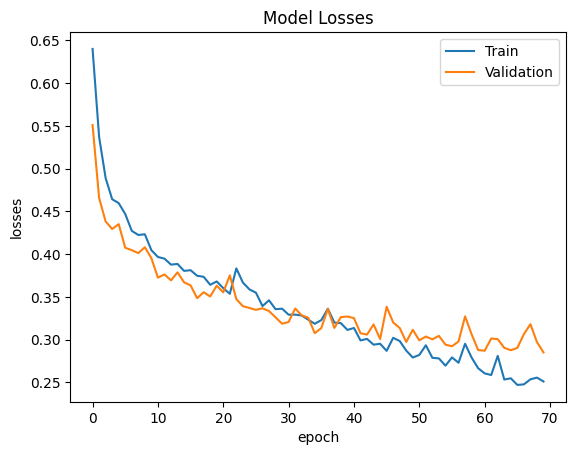

In [117]:
plt.plot(history.history['loss'], label = "Train")
plt.plot(history.history['val_loss'], label = "Validation")
plt.ylabel('losses')
plt.xlabel('epoch')
plt.legend()
plt.title('Model Losses')

Text(0.5, 1.0, 'Model Accuracy')

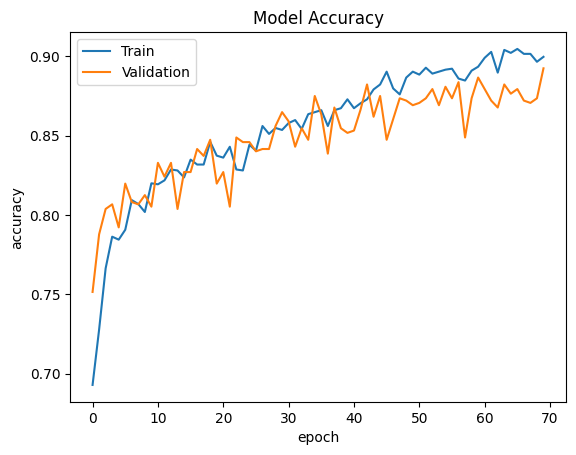

In [118]:
plt.plot(history.history['accuracy'], label = "Train")
plt.plot(history.history['val_accuracy'], label = "Validation")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.title('Model Accuracy')

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


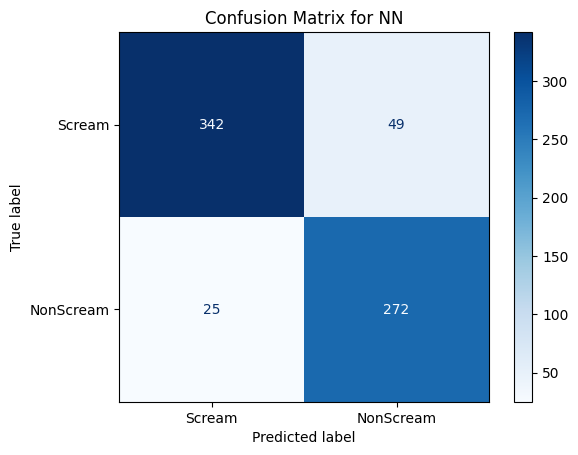

In [119]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(nx_test)
#Convert sigmoid probabilities to class labels
ytrue = [round(element) for element in ny_test]
y_true_labels = pd.Series((ytrue))

ypred = [round(element) for element in y_pred.reshape(688,)]
y_pred_labels = pd.Series((ypred))

#Confusoin Matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Scream", "NonScream"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for NN")
plt.show()


In [120]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [121]:
print("Accuracy is ", knn.score(nx_test, ny_test))

y_predict = knn.predict(nx_test)

Accuracy is  0.8866279069767442


Text(0.5, 1.0, 'Confusion Matrix for KNN Model')

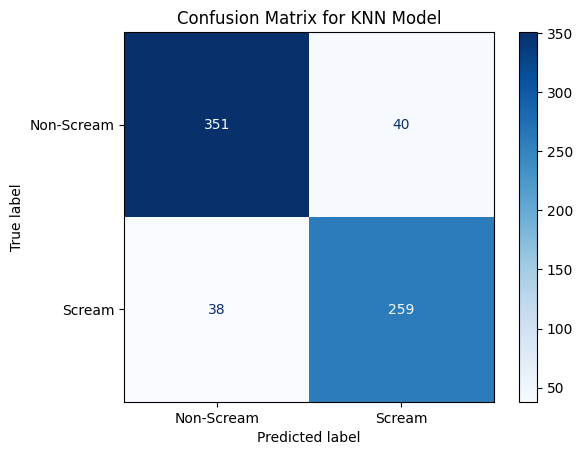

In [122]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

categories = ["Non-Scream", "Scream"]

cm = confusion_matrix(ny_test, knn.predict(nx_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for KNN Model")

In [123]:
from sklearn.svm import SVC

svm = SVC(kernel= "rbf", C=5)
svm.fit(x_train, y_train)

SVC(C=5)

In [124]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(ny_test,svm.predict(nx_test) )
print('accuracy score :', acc)

accuracy score : 0.877906976744186


Text(0.5, 1.0, 'Confusion Matrix for SVc Model')

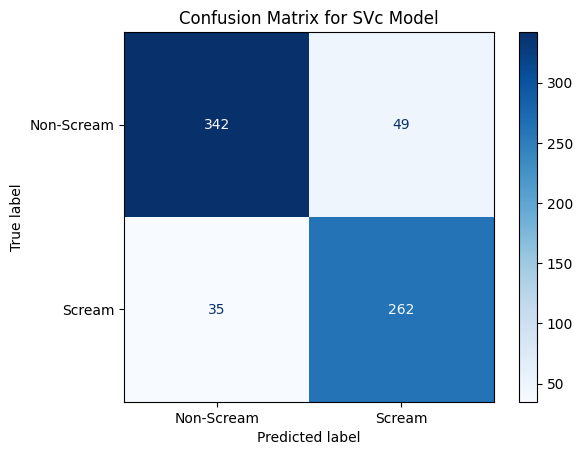

In [125]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

categories = ["Non-Scream", "Scream"]

cm = confusion_matrix(ny_test, svm.predict(nx_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for SVc Model")